In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import pandas as pd
import seaborn as sns

X, y = load_iris(return_X_y=True)
X = X[:, 2:4]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

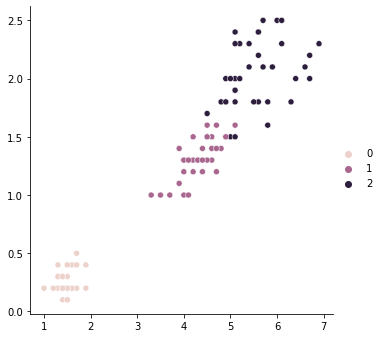

In [3]:
sns.relplot(kind='scatter', x = X_train[:,0], y = X_train[:,1], hue=y_train)

In [4]:
def mydist(v1, v2):
    return np.sqrt(((v1-v2)**2).sum())  # [X_1 y_1] - [x_2 y_2] = x_1 - x_2, y_1 -Y_2

print(X_test[0])
print(X_train[0])
print(X_test[0]-X_train[0])
print((X_test[0]-X_train[0])**2)
print(mydist(X_train[0], X_test[0]))

[1.4 0.1]
[1.6 0.2]
[-0.2 -0.1]
[0.04 0.01]
0.22360679774997913


In [8]:
dist_value = []
for x, y in zip(X_train, y_train):
    dist_value.append([mydist(x, X_test[20]),y])
# print(X_test[20])
# print(dist_value)
s = sorted(dist_value, key=lambda x: x[0])
# print(s)
ans_dict={}
for s_i in s[:5]:
    if s_i[1] in ans_dict.keys():
        ans_dict[s_i[1]]=ans_dict[s_i[1]]+1
    else:
        ans_dict[s_i[1]]=1

In [36]:
dist_value=[]
for d in X_train:
    dist_value.append(mydist(d, X_test[12]))
    #print(mydist(d, X_test[0]))
    
tdf = pd.DataFrame(y_train, index=dist_value)
print(tdf)
x = tdf.sort_index().head(5)
print(x.value_counts())
x.value_counts().index[0]

          0
3.712142  1
5.608030  2
2.193171  1
0.316228  0
4.741308  2
...      ..
2.657066  1
0.141421  0
0.223607  0
0.141421  0
4.651881  2

[112 rows x 1 columns]
0    5
dtype: int64


(0,)

In [9]:
x = KNeighborsClassifier()
x.fit(X_train, y_train)
x.predict(X_test)
# x.predict([[5.1, 3.5, 1.4, 0.2]])

array([0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2,
       2, 2, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0])